In [ ]:
# %pip install llama-index
# %pip install tiktoken
# %pip install openai
# %pip install networkx
# !python -m pip install -U matplotlib

In [1]:
prompt = """Extract all the knowledge triplets in the form of (subject, predicate, object) of the above Article. Avoid stopwords.

# Definition
- Triplets: Semantic triple is a set of 3 elements (subject, predicate, object)
- Subject: Entity or Object that performs the action or has a relationship with another entity or object. It typically appears as the first element in the triplet structure, representing the "subject" of the statement or relationship. In a triplet like (subject, predicate, object), the subject is the entity or object that the predicate describes or relates to the object. It provides information about the specific entity or object being referred to in the statement or relationship.
- Predicate: Predicate in a triplet refers to the action or attribute that is attributed to the subject or describes the relationship between the subject and the object. It typically appears as the second element in the triplet structure, representing the "predicate" of the statement or relationship. In a triplet like (subject, predicate, object), the predicate is the verb or adjective that provides information about the subject and its relationship to the object. It expresses what the subject is doing or what quality it possesses. The predicate helps to convey the main information or action in the statement or relationship.
- Object: The object in a triplet refers to the entity or object that receives the action or is being described by the subject and predicate. It typically appears as the third element in the triplet structure, representing the "object" of the statement or relationship. In a triplet like (subject, predicate, object), the object is the entity or object that the subject acts upon or is related to by the predicate. It provides additional information about the specific entity or object that is affected or involved in the statement or relationship.
- Triplets_inf: Triplets inferred means the triplets that are not explicitly mentioned in the text but can be inferred from the text.

Step 1. Lemmatize the text. Step 2. Extract the triplets. Step 3. Infer the triplets.

JSON: [{
  "Text": String
  "Triplets:" [[String, String, String], ...]
  "Triplets_inf": String
}]

Answer in JSON. The JSON should be a list of dictionaries whose keys are "Text", "Triplets" and "Triplets_inf".

"""

In [3]:
file="testing_text.txt"

with open(file, 'r') as file:
  original_document = file.read()

words = original_document.lower().split()

test_words_start = 150 # join the first 150 words
test_words_end = 300

document = ' '.join(words[test_words_start:test_words_end])

print(document)

study the opti- mization problem of choosing optimal pipelines based on input sentences. to do so, we train a transformer-based classification model that extracts contextual embeddings from the input and finds an appropriate pipeline. we study the efficacy of plumber for extracting the kg triples using standard datasets over three kgs: dbpedia, wikidata, and open research knowledge graph. our results demonstrate the effectiveness of plumber in dynamically generating kg completion pipelines, outperforming all baselines agnostic of the underlying kg. furthermore, we provide an analysis of collective failure cases, study the similarities and synergies among integrated components and discuss their limitations. keywords information extraction · nlp pipelines · software reusability · semantic search · semantic web 1 introduction since the early twenty-first century [8], there have been continuous efforts to extend the web with a global data graph using the resource data framework (rdf) to pu

In [16]:
from llama_index.core import Document, Settings
from llama_index.core.node_parser import SentenceSplitter
import tiktoken
from dotenv import load_dotenv
import os

load_dotenv()

openai_api_key = os.environ.get('OPENAI_API_KEY')

enc = tiktoken.get_encoding("cl100k_base")
text_list = [original_document]
documents = [Document(text=t) for t in text_list]

splitter = SentenceSplitter(chunk_size=1024,chunk_overlap=50)

nodes = splitter.get_nodes_from_documents(documents)

def tokenize(text: str):
  return len(enc.encode(text))

print(len(nodes), 'Nodes')
print('\n')
total_tokens = 0

for i, node in enumerate(nodes):
  tokens = tokenize(node.text)
  total_tokens += tokens
  print('Node Nº', i+1, f'| {tokens} Tokens')
  print(node.text)
  print('\n')

print('Total Tokens:', total_tokens)

16 Nodes


Node Nº 1 | 977 Tokens
Information extraction pipelines for knowledge graphs Mohamad Yaser Jaradeh 1 · Kuldeep Singh 2 · Markus Stocker3 · Andreas Both 4 · Sören Auer3 Received: 29 September 2021 / Revised: 16 December 2022 / Accepted: 25 December 2022 / Published online: 7 January 2023 © The Author(s) 2023 Abstract In the last decade, a large number of knowledge graph (KG) completion approaches were pro- posed. Albeit effective, these efforts are disjoint, and their collective strengths and weaknesses in effective KG completion have not been studied in the literature. We extend Plumber, a framework that brings together the research community’s disjoint efforts on KG completion. We include more components into the architecture of Plumber to comprise 40 reusable com- ponents for various KG completion subtasks, such as coreference resolution, entity linking, and relation extraction. Using these components, Plumber dynamically generates suitable knowledge extraction pipelines a

In [17]:
def get_triples(document, model):

    from openai import OpenAI

    client = OpenAI(
        api_key=openai_api_key
    )
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": f"{prompt}\n\n# ARTICLE\n\n{document}"
            }
        ],
        model=model,
        temperature=0,
        # response_format={
        #     "type": "json_object",
        # }
        # max_tokens=2000,
    )

    return chat_completion


gpt_4 = []

gpt_4.append(
    get_triples(
        nodes[0].text,
        "gpt-4-0125-preview"
    )
)

print(gpt_4) # 40.4s

[ChatCompletion(id='chatcmpl-95hpJNTn4qDLCQKgsto3vNxjCJKLa', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='```json\n[{\n  "Text": "Mohamad Yaser Jaradeh, Kuldeep Singh, Markus Stocker, Andreas Both, and Sören Auer extend Plumber to include 40 reusable components for KG completion.",\n  "Triplets": [\n    ["Mohamad Yaser Jaradeh, Kuldeep Singh, Markus Stocker, Andreas Both, Sören Auer", "extend", "Plumber"],\n    ["Plumber", "include", "40 reusable components"],\n    ["40 reusable components", "for", "KG completion"]\n  ],\n  "Triplets_inf": "The authors worked together to enhance Plumber\'s capabilities for knowledge graph completion."\n},{\n  "Text": "Plumber dynamically generates 432 distinct pipelines for knowledge extraction.",\n  "Triplets": [\n    ["Plumber", "generates", "432 distinct pipelines"]\n  ],\n  "Triplets_inf": "Plumber is capable of creating a variety of knowledge extraction pipelines."\n},{\n  "Text": "A transfor

In [28]:
response = gpt_4[0].choices[0].message.content

print(response)

```json
[{
  "Text": "Mohamad Yaser Jaradeh, Kuldeep Singh, Markus Stocker, Andreas Both, and Sören Auer extend Plumber to include 40 reusable components for KG completion.",
  "Triplets": [
    ["Mohamad Yaser Jaradeh, Kuldeep Singh, Markus Stocker, Andreas Both, Sören Auer", "extend", "Plumber"],
    ["Plumber", "include", "40 reusable components"],
    ["40 reusable components", "for", "KG completion"]
  ],
  "Triplets_inf": "The authors worked together to enhance Plumber's capabilities for knowledge graph completion."
},{
  "Text": "Plumber dynamically generates 432 distinct pipelines for knowledge extraction.",
  "Triplets": [
    ["Plumber", "generates", "432 distinct pipelines"]
  ],
  "Triplets_inf": "Plumber is capable of creating a variety of knowledge extraction pipelines."
},{
  "Text": "A transformer-based classification model is trained to choose optimal pipelines based on input sentences.",
  "Triplets": [
    ["A transformer-based classification model", "is trained", "t

In [29]:
import json
import re

# Remove the triple backticks and 'json' from the data string
response_string = re.sub(r'```json\n|\n```', '', response)

# Replace the tuples in the "Triplets" field with lists
response_string = re.sub(r'\(', '[', response_string)
response_string = re.sub(r'\)', ']', response_string)

# Convert the string to JSON
response = json.loads(response_string)

Text=[]
Triplets_inf=[]
Triplets=[]

for item in response:
    print("Original Sentences:")
    print(item['Text'])

print("\n")

for item in response:
    print("Inferred Triplets:")
    print(item['Triplets_inf'])

print("\n")

for item in response:
    print("Inferred Triplets:")
    Triplets.append(item['Triplets'])
    print(item['Triplets'])

Original Sentences:
Mohamad Yaser Jaradeh, Kuldeep Singh, Markus Stocker, Andreas Both, and Sören Auer extend Plumber to include 40 reusable components for KG completion.
Original Sentences:
Plumber dynamically generates 432 distinct pipelines for knowledge extraction.
Original Sentences:
A transformer-based classification model is trained to choose optimal pipelines based on input sentences.
Original Sentences:
Plumber outperforms all baselines in KG completion, tested on DBpedia, Wikidata, and Open Research Knowledge Graph.
Original Sentences:
The research community has developed numerous approaches to extract information from unstructured text to complement KGs.
Original Sentences:
Public KGs require continuous effort to align newly emerging unstructured information to the concepts of the KGs.


Inferred Triplets:
The authors worked together to enhance Plumber's capabilities for knowledge graph completion.
Inferred Triplets:
Plumber is capable of creating a variety of knowledge extr

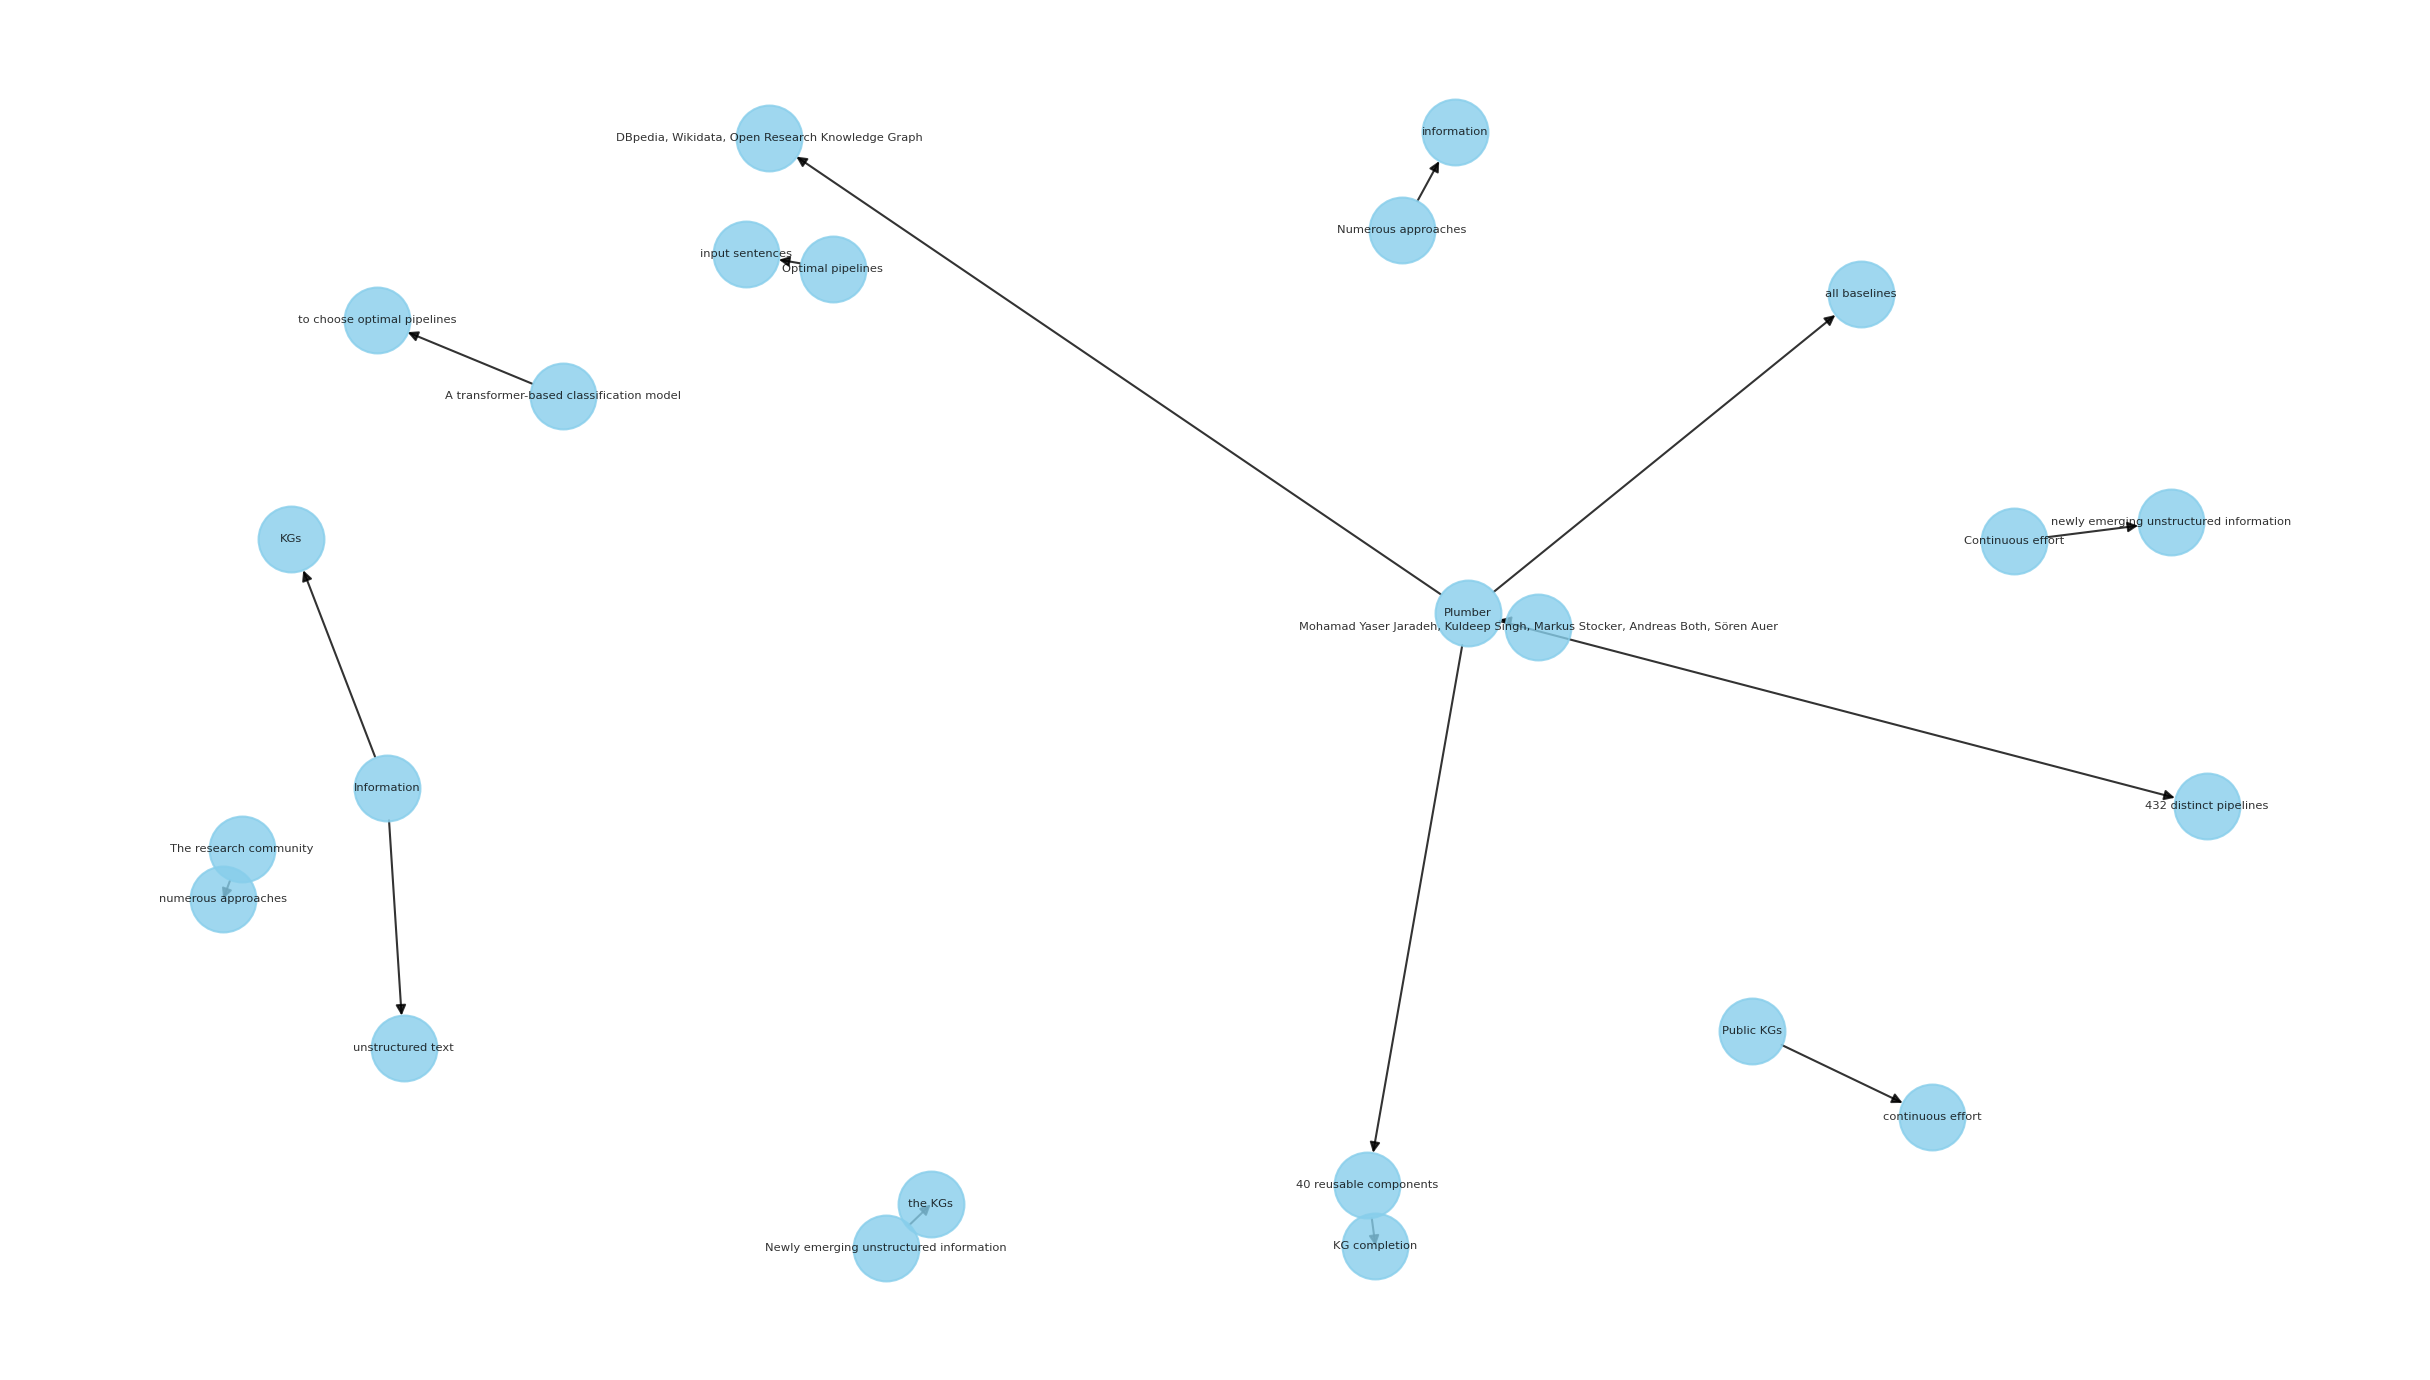

In [30]:
import matplotlib.pyplot as plt
import networkx as nx


G = nx.DiGraph()
for item in Triplets:
    for triplet in item:
        G.add_edge(triplet[0], triplet[2])


plt.figure(figsize=(16, 9), dpi=150, facecolor='w', edgecolor='k')

nx.draw(
  G,
  with_labels=True,
  node_color='skyblue',
  alpha=0.8,
  edge_cmap=plt.cm.Blues,
  font_size=5.5,
  node_size=1000,
)

plt.show()